In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/my_iris.csv")
veriler

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#KORELASYON İLİŞKİLERİ
corr_matrix = veriler.corr()
def en_yuksek_iliskiler(corr_matrix):
    # Korelasyon matrisini sütunlara göre sıralama
    sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

    # Sıralanmış korelasyon değerlerinin en yüksek olduğu sütun ikililerini yazdırma
    for i, (s1, s2) in enumerate(sorted_corr.index):
        if s1 != s2:  # Aynı sütun ikilisini tekrarlamamak için
            print(f"{s1}-{s2}: {sorted_corr[i]}")

# Örnek kullanım
en_yuksek_iliskiler(corr_matrix)


petal_length-petal_width: 0.9627570970509662
petal_width-petal_length: 0.9627570970509662
sepal_length-petal_length: 0.8717541573048716
petal_length-sepal_length: 0.8717541573048716
sepal_length-petal_width: 0.8179536333691642
petal_width-sepal_length: 0.8179536333691642
sepal_length-sepal_width: -0.10936924995064931
sepal_width-sepal_length: -0.10936924995064931
sepal_width-petal_width: -0.35654408961380507
petal_width-sepal_width: -0.35654408961380507
sepal_width-petal_length: -0.4205160964011539
petal_length-sepal_width: -0.4205160964011539


<ipython-input-47-b4fccfc7c866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = veriler.corr()


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [ ]:
veriSetim=pd.read_csv("/content/my_iris.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, [], ["sepal_length","sepal_width","petal_length","petal_width"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(columns="species",axis=1)
MyY = veriOnİslemeliSetDuzelt["species"]

#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0  yada 0-1-2 ŞEKLİNE ÇEVİRDİM
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le = LabelEncoder()
MyY = le.fit_transform(MyY)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
MyX

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
MyY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [ ]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred, average='weighted')

    # Calculate specificity
    unique_labels = set(y_true)
    specificity = {}
    for label in unique_labels:
        true_negatives = sum((y_true != label) & (y_pred != label))
        false_positives = sum((y_true != label) & (y_pred == label))
        specificity[label] = true_negatives / (true_negatives + false_positives)

    return f1, precision, sensitivity, specificity

XGBoost (Extreme Gradient Boosting)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split



# XGBoost veri yapısına dönüştür
dtrain = xgb.DMatrix(MyX_train, label=MyY_train)
dtest = xgb.DMatrix(MyX_test, label=MyY_test)

# XGBoost parametrelerini belirle
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}

# XGBoost modelini eğit
num_rounds = 50
xgboost_model = xgb.train(params, dtrain, num_rounds)

# Test verileri üzerinde tahmin yap
y_pred_XGBoost = xgboost_model.predict(dtest)

In [ ]:
f1_XGBoost, precision_XGBoost, sensitivity_XGBoost, specificity_XGBoost=calculate_metrics(MyY_test, y_pred_XGBoost)

In [ ]:
f1_XGBoost, precision_XGBoost, sensitivity_XGBoost, specificity_XGBoost

(1.0, 1.0, 1.0, {0: 1.0, 1: 1.0, 2: 1.0})

In [ ]:
accuracy_XGBoost = accuracy_score(MyY_test, y_pred_XGBoost)

LightGBM (Light Gradient Boosting Machine)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Verileri LightGBM veri yapısına dönüştür
train_data = lgb.Dataset(MyX_train, label=MyY_train)
test_data = lgb.Dataset(MyX_test, label=MyY_test)

# LightGBM parametrelerini belirle
params = {
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_class': 3,
    'num_leaves': 60,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

# LightGBM modelini eğit
num_rounds = 100
lightgbm_model = lgb.train(params, train_data, num_boost_round=num_rounds)

# Test verileri üzerinde tahmin yap
y_pred_proba = lightgbm_model.predict(MyX_test)
y_pred_LightGBM = y_pred_proba.argmax(axis=1)

# Sınıflandırma metriklerini hesapla
accuracy_LightGBM = accuracy_score(MyY_test, y_pred_LightGBM)
precision_LightGBM = precision_score(MyY_test, y_pred_LightGBM, average='macro')
recall_LightGBM = recall_score(MyY_test, y_pred_LightGBM, average='macro')
f1_LightGBM = f1_score(MyY_test, y_pred_LightGBM, average='macro')

print("Accuracy:", accuracy_LightGBM)
print("Precision:", precision_LightGBM)
print("Recall:", recall_LightGBM)
print("F1 Score:", f1_LightGBM)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from joblib import dump, load

# AdaBoostClassifier'ı oluştur
adaboost = AdaBoostClassifier(n_estimators=20, random_state=42)

# AdaBoost'u eğit
adaboost.fit(MyX_train, MyY_train)

# Test verileri üzerinde tahmin yap
y_pred_AdaBoost = adaboost.predict(MyX_test)

# Sınıflandırma metriklerini hesapla
accuracy_AdaBoost = accuracy_score(MyY_test, y_pred_AdaBoost)
precision_AdaBoost = precision_score(MyY_test, y_pred_AdaBoost, average='macro')
recall_AdaBoost = recall_score(MyY_test, y_pred_AdaBoost, average='macro')
f1_AdaBoost = f1_score(MyY_test, y_pred_AdaBoost, average='macro')

print("Accuracy:", accuracy_AdaBoost)
print("Precision:", precision_AdaBoost)
print("Recall:", recall_AdaBoost)
print("F1 Score:", f1_AdaBoost)

# Modeli kaydet
#dump(adaboost, 'adaboost_model.joblib')

# Modeli yükle
#loaded_model = load('adaboost_model.joblib')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**GRAFİK**

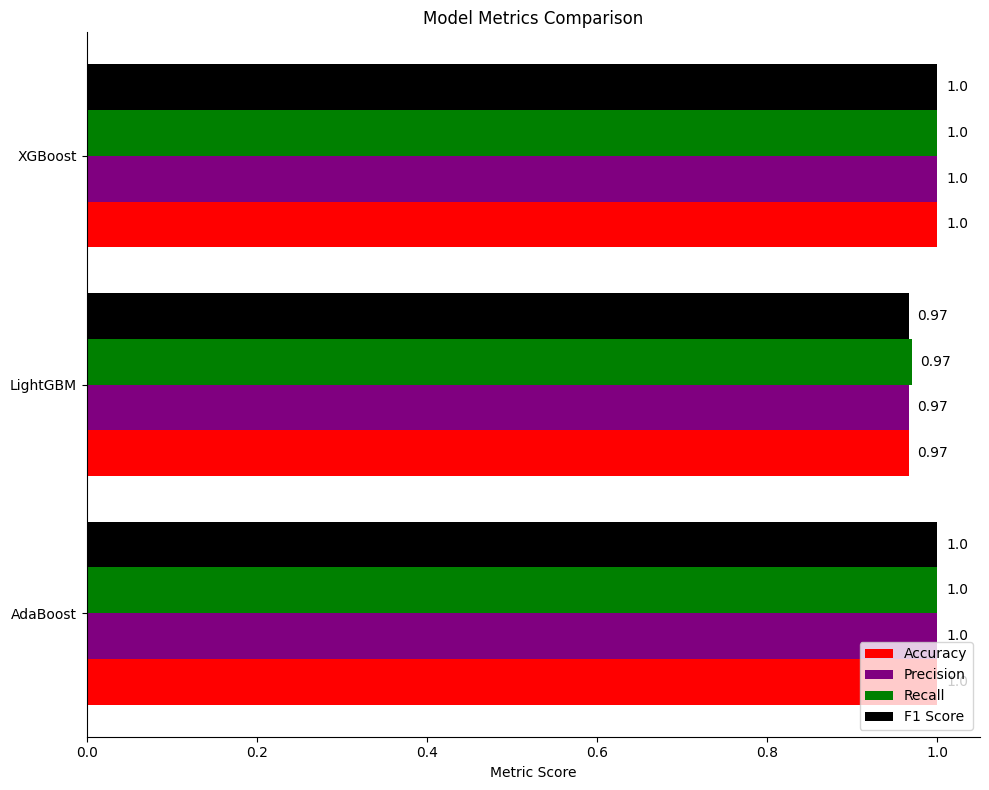

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrik sonuçları ve model isimleri
accuracy_scores = [accuracy_AdaBoost, accuracy_LightGBM, accuracy_XGBoost]
precision_scores = [precision_AdaBoost, precision_LightGBM, precision_XGBoost]
recall_scores = [recall_AdaBoost, recall_LightGBM, sensitivity_XGBoost]
f1_scores = [f1_AdaBoost, f1_LightGBM, f1_XGBoost]
model_names = ['AdaBoost', 'LightGBM', 'XGBoost']

# Metriklerin alt alta yer alacağı y ekseni
y = np.arange(len(model_names))

# Grafik boyutları
fig, ax = plt.subplots(figsize=(10, 8))

# Accuracy
ax.barh(y-0.3, accuracy_scores, color='red', height=0.2, align='center', label='Accuracy')
# Precision
ax.barh(y-0.1, precision_scores, color='purple', height=0.2, align='center', label='Precision')
# Recall
ax.barh(y+0.1, recall_scores, color='green', height=0.2, align='center', label='Recall')
# F1 Score
ax.barh(y+0.3, f1_scores, color='black', height=0.2, align='center', label='F1 Score')

# Y ekseninde model isimlerini göster
ax.set_yticks(y)
ax.set_yticklabels(model_names)

# Eksen etiketleri
ax.set_xlabel('Metric Score')
ax.set_title('Model Metrics Comparison')

# Görsel düzenlemeler
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='lower right')

# Metrik değerlerini çubukların üzerine yazdır
for i in range(len(model_names)):
    ax.text(accuracy_scores[i]+0.01, y[i]-0.3, str(round(accuracy_scores[i], 2)), color='black', fontsize=10, va='center')
    ax.text(precision_scores[i]+0.01, y[i]-0.1, str(round(precision_scores[i], 2)), color='black', fontsize=10, va='center')
    ax.text(recall_scores[i]+0.01, y[i]+0.1, str(round(recall_scores[i], 2)), color='black', fontsize=10, va='center')
    ax.text(f1_scores[i]+0.01, y[i]+0.3, str(round(f1_scores[i], 2)), color='black', fontsize=10, va='center')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the list of different machine learning algorithms
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    # xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
]

# Create empty lists to store the results
algo_names = []
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each algorithm in MLA
for model in MLA:
    # Fit the model on the training data
    model.fit(MyX_train, MyY_train)

    # Make predictions on the training data
    train_y_pred = model.predict(MyX_train)

    # Calculate the accuracy for the training data
    train_accuracy = accuracy_score(MyY_train, train_y_pred)

    # Make predictions on the testing data
    test_y_pred = model.predict(MyX_test)

    # Calculate the accuracy for the testing data
    test_accuracy = accuracy_score(MyY_test, test_y_pred)

    # Store the results in the lists
    algo_names.append(type(model).__name__)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Create a dataframe from the results
results_df = pd.DataFrame({
    'Algorithm': algo_names,
    'Training Accuracy': train_accuracy_scores,
    'Testing Accuracy': test_accuracy_scores
})

results_df